# Analysis
* We can appreciate that Maximum Temperature is higher on cities situated closer to the equator.
* At the same time, Maximum Temperature drops consistently as we get further away from latitude 0.
* Humidity, cloudiness and wind speed do not show correlation with their distance to the equator.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from matplotlib import style
style.use('ggplot')

# Import API key
from config_openw import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

# Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Variable for batches
batch_counter = 1

print("Beginning Data Retrieval")
print("------------------------")

# Loop through each batch
for x in range(1):
    
    # Variable for record counter
    record_counter = 0

    # Loop through the list of cities and perform a request for data on each
    
    for city in cities:
    
        try:
        
            response = requests.get(url + city).json()
            name.append(response['name'])
            cloudiness.append(response["weather"][0]["id"])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])
            
            #Add 1 to the counter prior to re-running the loop
            record_counter += 1
        
            print(f"Processing Record {record_counter} of set {batch_counter} | {city}")
            print(f"{url + city}")
    
        except Exception as e:
            print("City not found. Skipping...")


    #Add 1 to the counter prior to re-running the loop
    batch_counter = batch_counter + 1
    
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=qaanaaq
Processing Record 2 of set 1 | seguela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=seguela
Processing Record 3 of set 1 | hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=hilo
Processing Record 4 of set 1 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=castro
Processing Record 5 of set 1 | summerville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=summerville
Processing Record 6 of set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=ribeira grande
Processing Record 7 of set 1 | gafan

Processing Record 53 of set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=atuona
Processing Record 54 of set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=mataura
Processing Record 55 of set 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=hithadhoo
Processing Record 56 of set 1 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=cabo san lucas
Processing Record 57 of set 1 | berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=berlevag
Processing Record 58 of set 1 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=lebu
Processing Record 59 of set 1 | gernsbach
http://api.openweathermap.org/data/2.5/w

Processing Record 106 of set 1 | tshikapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=tshikapa
City not found. Skipping...
Processing Record 107 of set 1 | paita
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=paita
City not found. Skipping...
Processing Record 108 of set 1 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=saskylakh
Processing Record 109 of set 1 | conde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=conde
Processing Record 110 of set 1 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=qaqortoq
Processing Record 111 of set 1 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=victoria
Processing Record 112 of set 1

Processing Record 158 of set 1 | grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=grand gaube
Processing Record 159 of set 1 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=caravelas
Processing Record 160 of set 1 | lano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=lano
Processing Record 161 of set 1 | evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=evensk
Processing Record 162 of set 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=chokurdakh
Processing Record 163 of set 1 | new norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=new norfolk
Processing Record 164 of set 1 | severo-kurilsk
http://api.openweather

Processing Record 209 of set 1 | sile
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=sile
Processing Record 210 of set 1 | na klang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=na klang
Processing Record 211 of set 1 | sandwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=sandwick
Processing Record 212 of set 1 | dumai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=dumai
Processing Record 213 of set 1 | botad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=botad
Processing Record 214 of set 1 | catuday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=catuday
Processing Record 215 of set 1 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imp

City not found. Skipping...
Processing Record 262 of set 1 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=flin flon
City not found. Skipping...
Processing Record 263 of set 1 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=bathsheba
City not found. Skipping...
Processing Record 264 of set 1 | leeds
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=leeds
Processing Record 265 of set 1 | nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=nanortalik
Processing Record 266 of set 1 | san-pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=san-pedro
Processing Record 267 of set 1 | virginia beach
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a68

Processing Record 313 of set 1 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=sitka
Processing Record 314 of set 1 | navalgund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=navalgund
Processing Record 315 of set 1 | riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=riyadh
Processing Record 316 of set 1 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=vanimo
Processing Record 317 of set 1 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=kruisfontein
Processing Record 318 of set 1 | gao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=gao
Processing Record 319 of set 1 | taunggyi
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 367 of set 1 | balkanabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=balkanabat
City not found. Skipping...
Processing Record 368 of set 1 | boende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=boende
Processing Record 369 of set 1 | rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=rio grande
Processing Record 370 of set 1 | san vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=san vicente
Processing Record 371 of set 1 | saint-francois
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=saint-francois
Processing Record 372 of set 1 | kharan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=kharan
Processing Record 373 of set 1

Processing Record 418 of set 1 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=talnakh
City not found. Skipping...
Processing Record 419 of set 1 | lamar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=lamar
Processing Record 420 of set 1 | oriximina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=oriximina
Processing Record 421 of set 1 | port augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=port augusta
City not found. Skipping...
Processing Record 422 of set 1 | benicarlo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=benicarlo
Processing Record 423 of set 1 | orsha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=orsha
Processing Record 424 

Processing Record 471 of set 1 | khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=khani
Processing Record 472 of set 1 | el dorado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=el dorado
Processing Record 473 of set 1 | volovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=volovo
Processing Record 474 of set 1 | buraydah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=buraydah
Processing Record 475 of set 1 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=meulaboh
Processing Record 476 of set 1 | panguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=panguna
Processing Record 477 of set 1 | la rioja
http://api.openweathermap.org/data/2.5/weath

Processing Record 523 of set 1 | mezhdurechensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=mezhdurechensk
Processing Record 524 of set 1 | nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=nantucket
Processing Record 525 of set 1 | kaka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=kaka
Processing Record 526 of set 1 | tautira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=tautira
Processing Record 527 of set 1 | bukachacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=bukachacha
Processing Record 528 of set 1 | araouane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09913a6cb68dec55313a7a7a685505e4&q=araouane
Processing Record 529 of set 1 | karakol
http://api.openweathermap.o

In [7]:
# create a data frame from cities, lat, and temp
weather_dict = {"City": name,
                "Cloudiness":  cloudiness,
                "Country": country,
                "Date": date,
                "Humidity": humidity,
                "Lat": lat,
                "Lng": lng,
                "Max Temp": max_temp,
                "Wind Speed": wind_speed}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          532
Cloudiness    532
Country       532
Date          532
Humidity      532
Lat           532
Lng           532
Max Temp      532
Wind Speed    532
dtype: int64

In [8]:
weather_data.head()
weather_data.to_csv("Output/Weather_dataframe.csv")

# Latitude vs. Temperature Plot

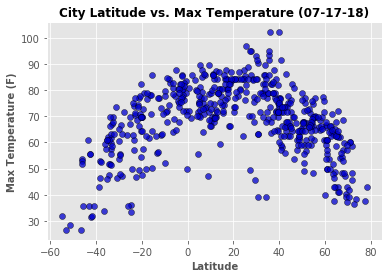

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m-%d-%y")
plt.title(f"City Latitude vs. Max Temperature ({now})" , size="large", fontweight='bold')
plt.xlabel("Latitude", size="medium", fontweight='bold')
plt.ylabel("Max Temperature (F)", size="medium", fontweight='bold')

# Save the figure
plt.savefig("Output/Latitude_vs_Max_Temp.png")

In [10]:
# Show plot
plt.show()

# Latitude vs. Humidity Plot

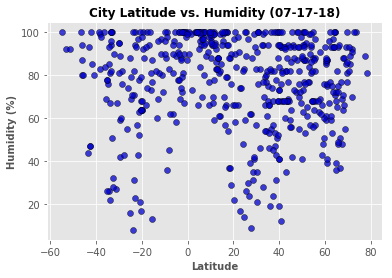

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m-%d-%y")
plt.title(f"City Latitude vs. Humidity ({now})" , size="large", fontweight='bold')
plt.xlabel("Latitude", size="medium", fontweight='bold')
plt.ylabel("Humidity (%)", size="medium", fontweight='bold')

# Save the figure
plt.savefig("Output/Latitude_vs_Humidity.png")

In [12]:
# Show plot
plt.show()

# Latitude vs. Cloudiness Plot

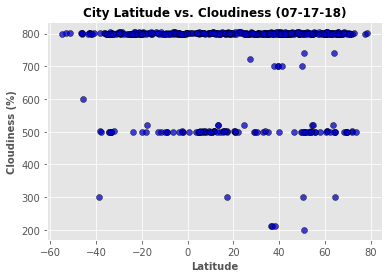

In [13]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m-%d-%y")
plt.title(f"City Latitude vs. Cloudiness ({now})" , size="large", fontweight='bold')
plt.xlabel("Latitude", size="medium", fontweight='bold')
plt.ylabel("Cloudiness (%)", size="medium", fontweight='bold')


# Save the figure
plt.savefig("Output/Latitude_vs_Cloudiness.png")

In [14]:
# Show plot
plt.show()

# Latitude vs. Wind Speed Plot

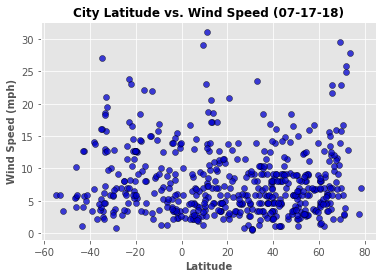

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m-%d-%y")
plt.title(f"City Latitude vs. Wind Speed ({now})" , size="large", fontweight='bold')
plt.xlabel("Latitude", size="medium", fontweight='bold')
plt.ylabel("Wind Speed (mph)", size="medium", fontweight='bold')

# Save the figure
plt.savefig("Output/Latitude_vs_Wind_Speed.png")

In [16]:
# Show plot
plt.show()